<a href="https://colab.research.google.com/github/ulyana2002/neural-networks-/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


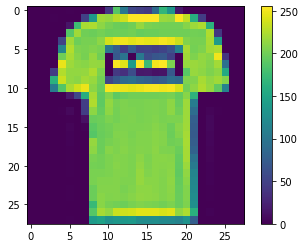

In [4]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

# Нормализация данных 

In [5]:
x_train = x_train / 255
x_test = x_test / 255

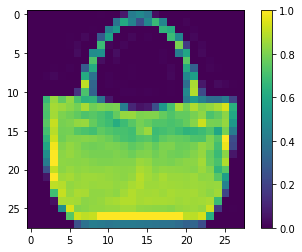

In [31]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

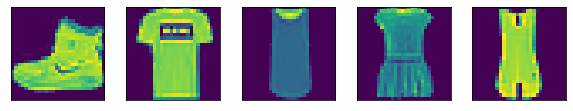

In [29]:
plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

plt.show()

# Создание модели нейронной сети 

In [8]:
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dense(10, activation="softmax")
 ])

In [9]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Обучение модели

In [20]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7546 - accuracy: 0.7566
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5146 - accuracy: 0.8256
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4699 - accuracy: 0.8395
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4447 - accuracy: 0.8465
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4274 - accuracy: 0.8521
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4126 - accuracy: 0.8579
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4024 - accuracy: 0.8613
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3925 - accuracy: 0.8643
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3834 - accuracy: 0.8664
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.375

Проверка точности предсказания 

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4120 - accuracy: 0.8546
Test accuracy: 0.8546000123023987


Предсказываем изображения 

In [22]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [24]:
predictions[0]

array([1.6849228e-08, 4.6177906e-10, 2.9295988e-09, 1.8274937e-09,
       1.0882990e-09, 2.9421330e-04, 6.2683363e-08, 1.5658869e-03,
       1.2000782e-05, 9.9812776e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
y_train[0]

9